In [154]:

import pandas as pd
import numpy as np

In [155]:
data = pd.read_csv("C:\\Users\\patel\\Desktop\\Housing.csv")

In [156]:
data.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [157]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [158]:
data.shape

(545, 13)

In [159]:
data.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [161]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [162]:
data.dropna(inplace=True)

In [163]:
data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [164]:
data.duplicated().sum()

0

In [165]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


C:\Users\patel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

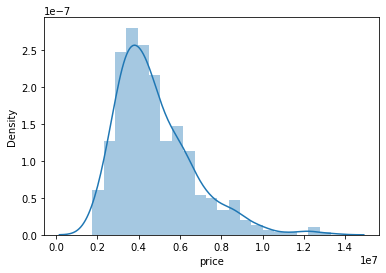

In [166]:
import seaborn as sns
sns.distplot(data['price'])

<AxesSubplot:>

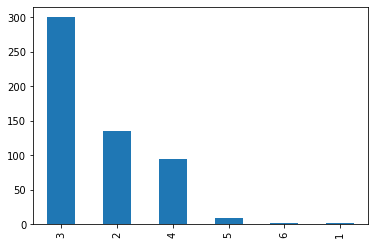

In [167]:
data['bedrooms'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

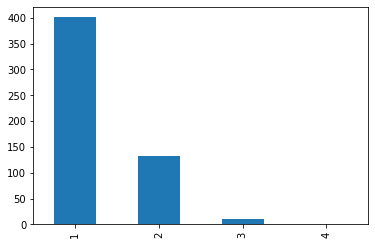

In [168]:
data['bathrooms'].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='stories', ylabel='price'>

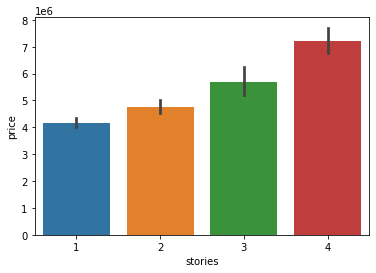

In [169]:
sns.barplot(x = data['stories'], y = data['price'])

In [170]:
data.corr()['price']

price        1.000000
area         0.535997
bedrooms     0.366494
bathrooms    0.517545
stories      0.420712
parking      0.384394
Name: price, dtype: float64

<AxesSubplot:>

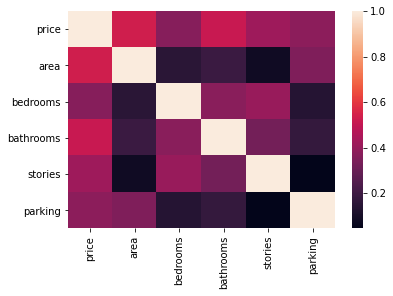

In [171]:
sns.heatmap(data.corr())

In [172]:
from sklearn.model_selection import train_test_split


np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [173]:
from sklearn.preprocessing import MinMaxScaler

In [174]:
scaler = MinMaxScaler()

In [175]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

<ipython-input-175-abd1c7a9995a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
C:\Users\patel\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [176]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
359,0.169697,0.155227,0.4,0.0,0.000000,yes,no,no,no,no,0.333333,no,unfurnished
19,0.615152,0.403379,0.4,0.5,0.333333,yes,no,no,no,yes,0.333333,yes,semi-furnished
159,0.321212,0.115628,0.4,0.5,0.000000,yes,yes,yes,no,yes,0.000000,no,furnished
35,0.548133,0.454417,0.4,0.5,1.000000,yes,no,no,no,yes,0.666667,no,furnished
28,0.575758,0.538015,0.8,0.5,0.333333,yes,no,yes,yes,no,0.666667,no,unfurnished


In [177]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.242345
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.285933
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


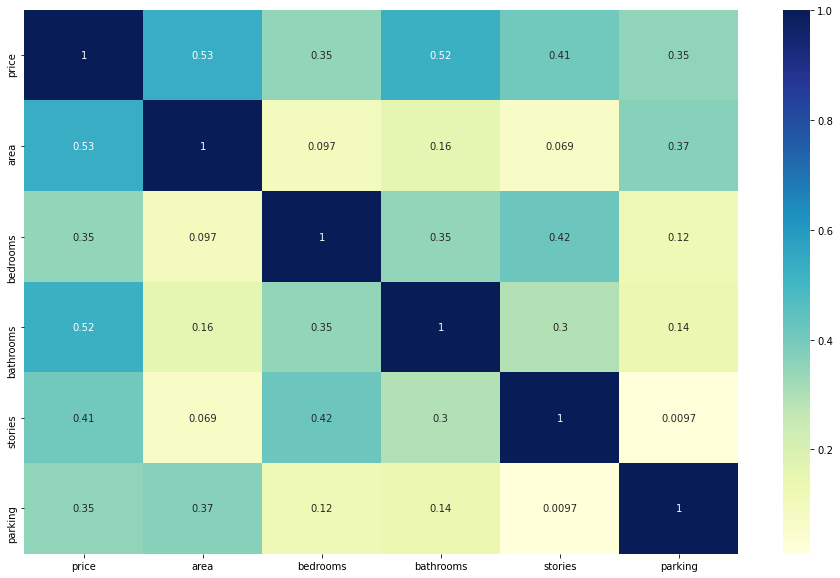

In [178]:
import matplotlib.pyplot as plt 
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()


In [179]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
data[varlist] = data[varlist].apply(binary_map)

In [180]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [181]:
status = pd.get_dummies(data['furnishingstatus'])

In [182]:
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [183]:
status = pd.get_dummies(data['furnishingstatus'], drop_first = True)
data = pd.concat([data, status], axis = 1)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [184]:
data.drop(['furnishingstatus'], axis = 1, inplace = True)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [185]:


from sklearn.model_selection import train_test_split

X = data.drop(['price'], axis=1)
Y = data['price']

x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state=1)



In [186]:


from sklearn import linear_model    

model = linear_model.LinearRegression()   

model.fit(x_train['area'].values.reshape(-1,1), y_train)



LinearRegression()

In [187]:

y_pred = model.predict(x_test['area'].values.reshape(-1,1)) 

y_pred = pd.DataFrame(y_pred)

y_pred

,0
0,5.224636e+06
1,6.151762e+06
2,7.053134e+06
3,5.301897e+06
4,5.385595e+06
...,...
104,4.303949e+06
105,4.606552e+06
106,8.212041e+06
107,5.881350e+06


In [188]:
y_test,y_pred



(62     7070000
 247    4550000
 142    5600000
 107    6125000
 483    2940000
         ...   
 201    4900000
 92     6405000
 66     6930000
 284    4270000
 187    5110000
 Name: price, Length: 109, dtype: int64,
                 0
 0    5.224636e+06
 1    6.151762e+06
 2    7.053134e+06
 3    5.301897e+06
 4    5.385595e+06
 ..            ...
 104  4.303949e+06
 105  4.606552e+06
 106  8.212041e+06
 107  5.881350e+06
 108  5.164545e+06
 
 [109 rows x 1 columns])

In [189]:
from sklearn.metrics import mean_squared_error, r2_score

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))

Coefficients: [429.22486342]
Intercept: 2546272.8839827273
Mean squared error (MSE): 2820642384250.13
Coefficient of determination (R^2): 0.33


In [190]:

from sklearn import linear_model  

model = linear_model.LinearRegression()   
model.fit(x_train, y_train)

LinearRegression()

In [191]:

y_pred = model.predict(x_test)   

y_pred = pd.DataFrame(y_pred)

y_pred

,0
0,6.305418e+06
1,6.213853e+06
2,6.552975e+06
3,5.461130e+06
4,4.250945e+06
...,...
104,4.718714e+06
105,6.925181e+06
106,6.963167e+06
107,4.276064e+06


In [192]:

y_test,y_pred

(62     7070000
 247    4550000
 142    5600000
 107    6125000
 483    2940000
         ...   
 201    4900000
 92     6405000
 66     6930000
 284    4270000
 187    5110000
 Name: price, Length: 109, dtype: int64,
                 0
 0    6.305418e+06
 1    6.213853e+06
 2    6.552975e+06
 3    5.461130e+06
 4    4.250945e+06
 ..            ...
 104  4.718714e+06
 105  6.925181e+06
 106  6.963167e+06
 107  4.276064e+06
 108  5.394113e+06
 
 [109 rows x 1 columns])

In [193]:

from sklearn.metrics import mean_squared_error, r2_score

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))


Coefficients: [ 2.34758252e+02  9.03891264e+04  1.03829336e+06  4.91816119e+05
  4.25372544e+05  3.25884254e+05  4.81202302e+05  9.31162583e+05
  6.77645625e+05  2.61311961e+05  5.97036488e+05 -7.48668500e+04
 -3.88959453e+05]
Intercept: 54420.597601749934
Mean squared error (MSE): 1586758224575.70
Coefficient of determination (R^2): 0.62
